<div style="border:solid Chocolate 2px; padding: 40px">
 
<b> Андрей, привет!👋</b>  

Меня зовут Кирилл Васильев, я буду ревьюером твоего проекта. Я предлагаю общаться на «ты», но если привычнее на «вы», просто скажи об этом! 

Я буду оставлять комментарии в твоем проекте. Пожалуйста, не удаляй их, они могут быть полезны в случае повторной проверки.

Свои комментарии я буду обозначать <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:
  
<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным. Здесь же я могу давать советы и предложения.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>


    <br/>
<div class="alert alert-info">
Рекомендую для твоих комментариев использовать синий или любой другой цветной фон. Я постараюсь ничего не пропустить, но если комментарии будут выделены, то это мне очень поможет!
</div>
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой руководитель будет поступать также. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score 
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


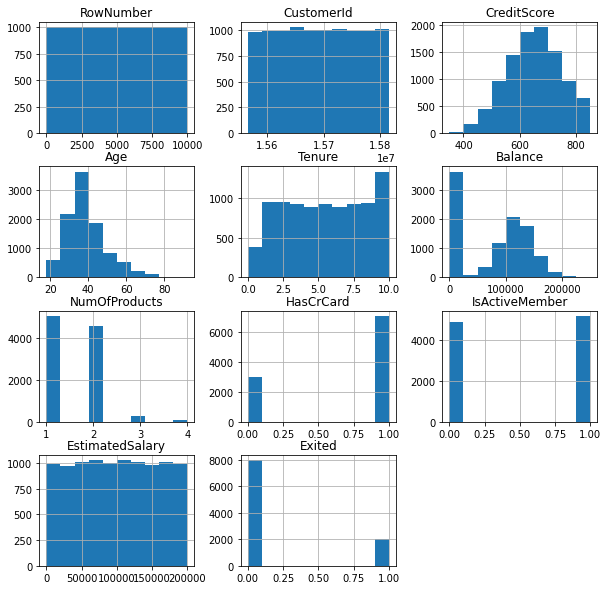

In [5]:
df.hist(figsize=(10, 10));

In [6]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 По импортам и загрузке все отлично.
</div>  


In [7]:
# Заполняем пропуски медианным значением.
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично. 
</div>
  


In [8]:
# Проверяем на явные дубликаты.
df.duplicated().sum()

0

In [9]:
# Изменим тип данных на нужный. 
df['Tenure'] = df['Tenure'].astype('Int64', errors='ignore')

## Исследование задачи

0    0.7963
1    0.2037
Name: Exited, dtype: float64


Text(0.5, 1.0, 'Баланс классов')

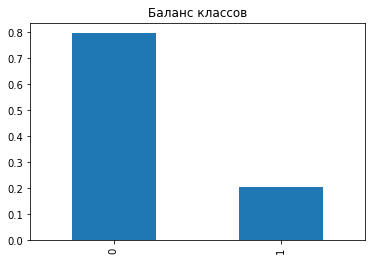

In [10]:
# Исследуем баланс классов.
class_frequency = df['Exited'].value_counts(normalize=True) 
print(class_frequency)
class_frequency.plot(kind='bar');
plt.title('Баланс классов')

<div class="alert alert-warning">
<h2><s> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Графики в проекте нужно подписать.
       
</div> 

Можно наблюдать дисбаланс классов. Классы несбалансированны, когда их соотношение далеко от 1:1. Баланс классов (англ. class balance) наблюдается, если их количество примерно равно. Обучим модель без учёта дисбаланса. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Можем более конкретно зафиксировать, что дисбаланс 1:4.
</div>
  

In [11]:
data_ohe = pd.get_dummies(df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1), drop_first=True)
data_ohe.dtypes

CreditScore            int64
Age                    int64
Tenure                 Int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Male            uint8
dtype: object

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Согласен. В дамми-ловушку не попались. Здесь все-таки по коду чуть правильнее сначала удалить ненужные колонки, а потом сделать энкодинг. «Матрешки» не считаются бест-практикой.
</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

В тренажере давался пример использования прямого кодирования с помощью get_dummies, однако это далеко не самый оптимальный вариант. Он подходит для анализа данных, но в машинном обучении может служить причиной ошибок при обучении моделей.
    
Можно использовать класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">OHE из sklearn</a>. Он точно понадобится в будущих проектах, можно потренироваться сейчас. 

Практикум подготовил инструкцию, как использовать OHE: https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing 

А теперь замечания «под звездочкой»:

Есть загвоздка, что нам нужно будет одновременно использовать параметры drop='first' и handle_unknown='ignore’.  в OHE, а на платформе такое сочетание может выдавать ошибку (в части случаев). Если ошибка появляется, необходимо загрузить нужную версию сайкит-лерна. Для этого:

1. В отдельной строке в самом начале проекта запускаем такую команду:
 `!pip install scikit-learn==1.1.3`
     
2. Находим в меню юпитера кнопку `Kernel`, нажимаем и выбираем Restart&Run all 


И сразу уточню, что OHE мы используем уже после разделения выборок на обучающую, валидационную и тестовую. Обучаем на трейне, применяем ко всем. Кодируем после разбиения по аналогии с масштабированием. Посмотреть поподробнее также <a href="https://stackoverflow.com/questions/55525195/do-i-have-to-do-one-hot-encoding-separately-for-train-and-test-dataset">можно здесь</a> .
      
</div> 


In [12]:
# Разбиваем данные на тренировочную, валидационную и тестовую выбоку в пропорции 3:1:1 и проверяем результат.
features = data_ohe.drop(['Exited'], axis=1)
target = data_ohe['Exited']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, \
                                                                            random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, test_size=0.25, \
                                                                            random_state=12345)
display(features_train.shape)
display(features_valid.shape)
display(features_test.shape)
display(target_train.shape)
display(target_valid.shape)
target_test.shape

(6000, 11)

(2000, 11)

(2000, 11)

(6000,)

(2000,)

(2000,)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 С разбиением на выборки согласен. 
</div>


In [48]:
scaler = StandardScaler()

numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
           'Geography_Germany', 'Geography_Spain', 'Gender_Male']

scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric]) 
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
pd.options.mode.chained_assignment = None
display(features_train.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
492,-0.134048,-0.078068,-0.369113,0.076163,0.816929,-1.550255,0.968496,0.331571,-0.579146,-0.576837,-1.103311
6655,-1.010798,0.494555,-0.007415,0.136391,-0.896909,0.645055,0.968496,-0.727858,-0.579146,-0.576837,0.906363
4287,0.639554,1.353490,-1.454209,0.358435,-0.896909,0.645055,0.968496,-0.477006,1.726679,-0.576837,0.906363
42,-0.990168,2.116987,-1.092511,0.651725,-0.896909,0.645055,0.968496,-0.100232,-0.579146,-0.576837,-1.103311
8178,0.567351,0.685430,0.715982,0.813110,0.816929,0.645055,0.968496,0.801922,-0.579146,-0.576837,-1.103311


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично. Я бы убрал предупреждения. `warnings.filterwarnings('ignore')` после `import warnings`. 
    
`pd.options.mode.chained_assignment = None` - тоже подойдет, но нужно сделать до кода.
    
Если выводить таблицу не через print(), а через display(), будет удобнее все воспринимать.
</div>


In [14]:
# # Подберем гиперпараметры для модели дерева решений.
# model = DecisionTreeClassifier()
# parametrs = { 'max_depth': range (1,13, 2),
#               'min_samples_leaf': range (1,8),
#               'min_samples_split': range (2,10,2) }

# grid = GridSearchCV(model, parametrs, cv=5)
# grid.fit(features_train, target_train)
# # Выводим результат:
# grid.best_params_

In [15]:
# Подберем гиперпараметры с помощью циклов.
for depth in range(1,13, 2):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print('max_depth =', depth, ': ', end='')
    print(f1_score(target_valid, predictions_valid))
for leaf in range(1, 8):
    model = DecisionTreeClassifier(random_state=12345, min_samples_leaf=leaf)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print('min_samples_leaf =', leaf, ': ', end='')
    print(f1_score(target_valid, predictions_valid))
for split in range(2,10,2):
    model = DecisionTreeClassifier(random_state=12345, min_samples_split=split)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print('min_samples_split =', split, ': ', end='')
    print(f1_score(target_valid, predictions_valid))

max_depth = 1 : 0.0
max_depth = 3 : 0.39382239382239387
max_depth = 5 : 0.5488372093023256
max_depth = 7 : 0.5583596214511041
max_depth = 9 : 0.5357142857142857
max_depth = 11 : 0.5131964809384164
min_samples_leaf = 1 : 0.48387096774193544
min_samples_leaf = 2 : 0.5067024128686327
min_samples_leaf = 3 : 0.5117493472584856
min_samples_leaf = 4 : 0.5434173669467787
min_samples_leaf = 5 : 0.5362517099863201
min_samples_leaf = 6 : 0.5397727272727272
min_samples_leaf = 7 : 0.5335195530726258
min_samples_split = 2 : 0.48387096774193544
min_samples_split = 4 : 0.4846153846153846
min_samples_split = 6 : 0.5045045045045045
min_samples_split = 8 : 0.5116279069767442


<br/>
<div class="alert alert-info">
Наши гиперпараметры: max_depth = 7, min_samples_leaf = 4, min_samples_split = 8
</div>



<div class="alert alert-warning">
<h2> Комментарий ревьюера  #2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Tут есть нюанс, что хорошо бы перебирать с вложенными циклами, тогда мы перебирем все комбинации и найдем лучшую. Сейчас же ты просто перебираешь сначала один параметр, потом следующий итд. При этом оптимальный один параметр может в сочетании вместе с оптимальным другим работать плохо.
    
`for est in range(10, 151, 10):
    for depth in range(1, 16):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)`
   
Такой вариант предпочтетельнее.
       
</div>


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>

В этом проекте, к сожалению, использование GridSearchCV будет не везде хорошим решением. Например, его нельзя использовать с апсемплингом, так как у нас утекут признаки из одной выборки в другую (фактически обучаться и валидироваться будем на одних данных).
    
Также при использовании кросс-валидации нам не стоит отдельно выделять валидационную выборку - она уже заложена в самом алгоритме кросс-валидации. Подробнее можно почитать здесь: https://habr.com/ru/company/ods/blog/322534/ 
    
Ну и при апсемплинге и кросс-валидации мы неминуемо апсемплируем и тренировочную, и валидацинную выборки. То же самое и с даунсемплингом. Остается только применять взвешенные классы. А по заданию нам важно посмотреть минимум две методики. Поэтому как не крути − придется заменить кросс-валидацию подбором гиперпараметров в цикле.
    
Кросс-валидация будет часто встречаться в последующих проектах, где она будет смотреться отлично. 
    
***
    
Кроме того, если делаем кросс-валидацию, нужно определить скорер - метрику, по которой оптимизируемся. По умолчанию там accuracy, нам она не подходит.
       
</div>

Оптимальные параметры: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 8}

In [16]:
# Cоздание и обучение модели дерева решений для задачи классификации.
model = DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=8, random_state=12345) 
model.fit(features_train, target_train) 
# Проверим F1-меру на валидационной выборке
predictions = model.predict(features_valid)
f1 = f1_score(target_valid, predictions)
f1

0.5583596214511041

In [17]:
# Подберем гиперпараметры для модели случайного леса.
# model_2 = RandomForestClassifier()
# parametrs = { 'n_estimators': range (10, 51, 10),
#               'max_depth': range (1,13, 2),
#               'min_samples_leaf': range (1,8),
#               'min_samples_split': range (2,10,2) }

# grid = GridSearchCV(model_2, parametrs, cv=5)
# grid.fit(features_train, target_train)
# # Выводим результат:
# grid.best_params_

In [18]:
# Подберем гиперпараметры с помощью циклов.
for depth in range(1,13, 2):
    model = RandomForestClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print('max_depth =', depth, ': ', end='')
    print(f1_score(target_valid, predictions_valid))
for leaf in range(1, 8):
    model = RandomForestClassifier(random_state=12345, min_samples_leaf=leaf)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print('min_samples_leaf =', leaf, ': ', end='')
    print(f1_score(target_valid, predictions_valid))
for split in range(2,10,2):
    model = RandomForestClassifier(random_state=12345, min_samples_split=split)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print('min_samples_split =', split, ': ', end='')
    print(f1_score(target_valid, predictions_valid))
for estim in range(10,101,10):
    model = RandomForestClassifier(random_state=12345, n_estimators=estim)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print('n_estimators =', estim, ': ', end='')
    print(f1_score(target_valid, predictions_valid))

max_depth = 1 : 0.0
max_depth = 3 : 0.25165562913907286
max_depth = 5 : 0.45283018867924535
max_depth = 7 : 0.5223367697594501
max_depth = 9 : 0.5433333333333333
max_depth = 11 : 0.5451559934318554
min_samples_leaf = 1 : 0.5596184419713831
min_samples_leaf = 2 : 0.5436893203883495
min_samples_leaf = 3 : 0.5528455284552846
min_samples_leaf = 4 : 0.5526315789473684
min_samples_leaf = 5 : 0.549342105263158
min_samples_leaf = 6 : 0.5531914893617021
min_samples_leaf = 7 : 0.5478547854785478
min_samples_split = 2 : 0.5596184419713831
min_samples_split = 4 : 0.5457463884430176
min_samples_split = 6 : 0.5457463884430176
min_samples_split = 8 : 0.5509554140127388
n_estimators = 10 : 0.5197368421052632
n_estimators = 20 : 0.5369774919614148
n_estimators = 30 : 0.5451612903225806
n_estimators = 40 : 0.5564387917329093
n_estimators = 50 : 0.554140127388535
n_estimators = 60 : 0.5530546623794211
n_estimators = 70 : 0.5559105431309904
n_estimators = 80 : 0.5550239234449761
n_estimators = 90 : 0.5573

<br/>
<div class="alert alert-info">
Оптимальные параметры: {'max_depth': 11,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 50}
</div>

In [19]:
# Создание и обучение модели случайного леса. .
model_2 = RandomForestClassifier(max_depth=11, min_samples_leaf=3, min_samples_split=8, n_estimators=50, random_state=12345)
model_2.fit(features_train, target_train)
# Проверим F1-меру на валидационной выборке
predictions_2 = model_2.predict(features_valid)
f1 = f1_score(target_valid, predictions_2)
f1

0.5544554455445545

In [20]:
# Подберем гиперпараметры для модели логистической регрессии.
# model_3 = LogisticRegression()
# parametrs = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

# grid = GridSearchCV(model_3, parametrs, cv=10)
# grid.fit(features_train, target_train)
# # Выводим результат:
# grid.best_params_

In [21]:
# Подберем гиперпараметры с помощью циклов.
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    model = LogisticRegression(random_state=12345, C=c)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print('C =', c, ': ', end='')
    print(f1_score(target_valid, predictions_valid))

C = 0.001 : 0.015189873417721518
C = 0.01 : 0.24242424242424243
C = 0.1 : 0.30131826741996237
C = 1 : 0.30131826741996237
C = 10 : 0.30451127819548873
C = 100 : 0.30451127819548873
C = 1000 : 0.30451127819548873


Оптимальные параметры: {'C': 10}

In [22]:
# Создание и обучение модели логической регрессии.
model_3 = LogisticRegression(C=10, solver='liblinear', random_state=12345)
model_3.fit(features_train, target_train)
# Проверим F1-меру на валидационной выборке
predictions_3 = model_3.predict(features_valid)
f1 = f1_score(target_valid, predictions_3)
f1

0.30451127819548873

С дисбалансом классов предсказуемо не получилось достичь F1-меры в 0.59. Улучшим качество модели, учитывая дисбаланс классов. 

<br/><div class="alert alert-info">
Подбор гиперпараметров цикле почти идентичный с GreedSearch, с дисбалансом классов нужного результата не достигнуть.
</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Нужно будет все переписать в циклах. Конкретно здесь ошибка в том, что ранее выделили валидационную выборку, которая не пригодилась, хотя это большая и важная часть данных, а датасет у нас маленький.
       
</div> 

## Борьба с дисбалансом

Добавим взвешивание классов (параметр class_weight='balanced') в наши модели.
<br/><div class="alert alert-info">
И подберем заново гиперпараметры.
</div>

In [23]:
# Подберем гиперпараметры для модели со взвешеными классами с помощью циклов.
for depth in range(1,13, 2):
    model = DecisionTreeClassifier(random_state=12345, class_weight='balanced', max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print('max_depth =', depth, ': ', end='')
    print(f1_score(target_valid, predictions_valid))
for leaf in range(1, 8):
    model = DecisionTreeClassifier(random_state=12345, class_weight='balanced', min_samples_leaf=leaf)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print('min_samples_leaf =', leaf, ': ', end='')
    print(f1_score(target_valid, predictions_valid))
for split in range(2,10,2):
    model = DecisionTreeClassifier(random_state=12345, class_weight='balanced', min_samples_split=split)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print('min_samples_split =', split, ': ', end='')
    print(f1_score(target_valid, predictions_valid))

max_depth = 1 : 0.4750733137829912
max_depth = 3 : 0.49761677788369874
max_depth = 5 : 0.5489078822412156
max_depth = 7 : 0.5535353535353534
max_depth = 9 : 0.5145631067961165
max_depth = 11 : 0.48846960167714887
min_samples_leaf = 1 : 0.4708926261319535
min_samples_leaf = 2 : 0.47640966628308407
min_samples_leaf = 3 : 0.5032258064516129
min_samples_leaf = 4 : 0.4984924623115577
min_samples_leaf = 5 : 0.49466950959488265
min_samples_leaf = 6 : 0.494240837696335
min_samples_leaf = 7 : 0.49345417925478346
min_samples_split = 2 : 0.4708926261319535
min_samples_split = 4 : 0.4818401937046005
min_samples_split = 6 : 0.47816091954022993
min_samples_split = 8 : 0.4910313901345291


<br/><div class="alert alert-info">
Оптимальные параметры: {'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 8,}
</div>

In [24]:
# Cоздание и обучение модели дерева решений для задачи классификации.
model = DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=8, class_weight='balanced', 
                               random_state=12345) 
model.fit(features_train, target_train) 
# Проверим F1-меру на валидационной выборке
predictions = model.predict(features_valid)
f1 = f1_score(target_valid, predictions)
f1

0.561122244488978

<br/>
<div class="alert alert-info">
Неплохой результат, немного лучше, чем если не подбирать гиперпараметры заново.
</div>

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Здесь изменились вводные  - теперь используем class_weight='balanced'. Необходимо заново обучать модели и заново находить лучшие гиперпараметры.

</div>


In [25]:
# Подберем гиперпараметры с помощью циклов.
for depth in range(1,13, 2):
    model = RandomForestClassifier(random_state=12345, class_weight='balanced', max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print('max_depth =', depth, ': ', end='')
    print(f1_score(target_valid, predictions_valid))
for leaf in range(1, 8):
    model = RandomForestClassifier(random_state=12345, class_weight='balanced', min_samples_leaf=leaf)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print('min_samples_leaf =', leaf, ': ', end='')
    print(f1_score(target_valid, predictions_valid))
for split in range(2,10,2):
    model = RandomForestClassifier(random_state=12345, class_weight='balanced', min_samples_split=split)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print('min_samples_split =', split, ': ', end='')
    print(f1_score(target_valid, predictions_valid))
for estim in range(10,101,10):
    model = RandomForestClassifier(random_state=12345, class_weight='balanced', n_estimators=estim)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print('n_estimators =', estim, ': ', end='')
    print(f1_score(target_valid, predictions_valid))

max_depth = 1 : 0.5014191106906338
max_depth = 3 : 0.5385365853658536
max_depth = 5 : 0.5529767911200807
max_depth = 7 : 0.5812154696132596
max_depth = 9 : 0.5821256038647343
max_depth = 11 : 0.5880794701986756
min_samples_leaf = 1 : 0.5469255663430421
min_samples_leaf = 2 : 0.5743440233236151
min_samples_leaf = 3 : 0.6084583901773534
min_samples_leaf = 4 : 0.6098191214470284
min_samples_leaf = 5 : 0.6148055207026349
min_samples_leaf = 6 : 0.6076260762607626
min_samples_leaf = 7 : 0.6004901960784313
min_samples_split = 2 : 0.5469255663430421
min_samples_split = 4 : 0.5722983257229832
min_samples_split = 6 : 0.5973645680819912
min_samples_split = 8 : 0.5929078014184397
n_estimators = 10 : 0.5254515599343186
n_estimators = 20 : 0.5451559934318554
n_estimators = 30 : 0.5575364667747165
n_estimators = 40 : 0.551948051948052
n_estimators = 50 : 0.542763157894737
n_estimators = 60 : 0.5326797385620915
n_estimators = 70 : 0.5365853658536586
n_estimators = 80 : 0.5413290113452188
n_estimators 

<br/><div class="alert alert-info">
Оптимальные параметры: {'max_depth': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
  n_estimators = 50}
</div>

In [26]:
# Создание и обучение модели случайного леса. .
model_2 = RandomForestClassifier(max_depth=11, min_samples_leaf=5, min_samples_split=8, n_estimators=50, 
                                 class_weight='balanced', 
                                 random_state=12345)
model_2.fit(features_train, target_train)
# Проверим F1-меру на валидационной выборке
predictions_2 = model_2.predict(features_valid)
f1 = f1_score(target_valid, predictions_2)
print('f1:', f1)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid) 

print('auc-roc:', auc_roc)

f1: 0.6051660516605165
auc-roc: 0.8434382048547253


Отлично! Удалось достичь нужного показателя!

In [27]:
# Подберем гиперпараметры с помощью циклов.
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    model = LogisticRegression(random_state=12345, class_weight='balanced', C=c)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print('C =', c, ': ', end='')
    print(f1_score(target_valid, predictions_valid))

C = 0.001 : 0.478494623655914
C = 0.01 : 0.47457627118644063
C = 0.1 : 0.4741532976827095
C = 1 : 0.47542448614834676
C = 10 : 0.47542448614834676
C = 100 : 0.47542448614834676
C = 1000 : 0.47542448614834676


In [28]:
# Создание и обучение модели логической регрессии.
model_3 = LogisticRegression(C=0.001, solver='liblinear', class_weight='balanced', random_state=12345)
model_3.fit(features_train, target_train)
# Проверим F1-меру на валидационной выборке
predictions_3 = model_3.predict(features_valid)
f1 = f1_score(target_valid, predictions_3)
f1

0.47429519071310106

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь та же рекомендация по циклам.
       
</div> 

Метрика F1 улучшилась на всех моделях, лучший показатель у модели случайного леса, - 0.60.

Проведем увеличение выборки (техника upsampling).

In [29]:
def upsample(features, target, repeat):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

(9657, 11)
(9657,)


<br/><div class="alert alert-info">
 Изменим параметр repeat на 4, чтобы компенсировать баланс классов 1:4
</div>

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Здесь ты дублируешь редкий класс в 10 раз. У нас же, как мы увидели раньше, дисбаланс составляет 1:4. То есть, теперь окажется, что бывший редкий класс будет в 2,5 раза чаще встречаться.
    
Правильно будет довести баланс классов до 1:1, то есть, умножить на 4 (подав такой коэффициент в функцию).

</div> 



<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично, что используешь рукописную функцию, но здесь можно все оптимизировать, используя <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html">SMOTE</a> для увеличения выборки и <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html">RandomUnderSampler</a>  для уменьшения. 
    
Апсемплинг делается очень просто:
    
`oversample = SMOTE(random_state=RANDOM_STATE)`

`features_train_up, target_train_up = oversample.fit_resample(features_train_enc, target_train)`
    
*предварительно импотрировав `from imblearn.over_sampling import SMOTE`

**Чтобы импортировать imblearn его сначала требуется проинсталлировать. через `!pip install imblearn`

В некоторых случаях качество может при применении SMOTE как улучшаться, так и ухудшаться в пределах статистической погрешности. Алгоритм не дублирует строки, а создает новые с помощью метода ближайших соседей.
    
</div>

In [30]:
# Подберем гиперпараметры для модели с увеличенной выборкой с помощью циклов.
for depth in range(1,13, 2):
    model = DecisionTreeClassifier(random_state=12345, class_weight='balanced', max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    print('max_depth =', depth, ': ', end='')
    print(f1_score(target_valid, predictions_valid))
for leaf in range(1, 8):
    model = DecisionTreeClassifier(random_state=12345, class_weight='balanced', min_samples_leaf=leaf)
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    print('min_samples_leaf =', leaf, ': ', end='')
    print(f1_score(target_valid, predictions_valid))
for split in range(2,10,2):
    model = DecisionTreeClassifier(random_state=12345, class_weight='balanced', min_samples_split=split)
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    print('min_samples_split =', split, ': ', end='')
    print(f1_score(target_valid, predictions_valid))

max_depth = 1 : 0.4750733137829912
max_depth = 3 : 0.49761677788369874
max_depth = 5 : 0.5489078822412156
max_depth = 7 : 0.5529767911200807
max_depth = 9 : 0.5136186770428015
max_depth = 11 : 0.49320794148380354
min_samples_leaf = 1 : 0.4728682170542636
min_samples_leaf = 2 : 0.4818401937046005
min_samples_leaf = 3 : 0.5017502917152858
min_samples_leaf = 4 : 0.5088888888888888
min_samples_leaf = 5 : 0.5032537960954446
min_samples_leaf = 6 : 0.4940668824163969
min_samples_leaf = 7 : 0.4984025559105431
min_samples_split = 2 : 0.4728682170542636
min_samples_split = 4 : 0.4806201550387597
min_samples_split = 6 : 0.4779874213836478
min_samples_split = 8 : 0.4751515151515151


In [31]:
# Cоздание и обучение модели дерева решений для задачи классификации.
model = DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=4, class_weight='balanced',
                               random_state=12345) 
model.fit(features_upsampled, target_upsampled) 
# Проверим F1-меру на валидационной выборке
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
f1

0.559118236472946

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь также нужно подобрать гиперпараметры заново, но апсемплинг не будет сочетаться с кросс-валидацией, так как при разбиении на сплиты внутри кросс-валидации у нас одни и те же строки попадут в две выборки, что приведет к переобучению. Также мы неминуемо апсемплируем тестовый сплит, что также делать не нужно.
    
Поэтому еще раз предлагаю здесь использовать подбор гиперпарамтров в цикле.
       
</div> 
  

In [32]:
# Подберем гиперпараметры с помощью циклов.
for depth in range(1,13, 2):
    model = RandomForestClassifier(random_state=12345, class_weight='balanced', max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    print('max_depth =', depth, ': ', end='')
    print(f1_score(target_valid, predictions_valid))
for leaf in range(1, 8):
    model = RandomForestClassifier(random_state=12345, class_weight='balanced', min_samples_leaf=leaf)
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    print('min_samples_leaf =', leaf, ': ', end='')
    print(f1_score(target_valid, predictions_valid))
for split in range(2,10,2):
    model = RandomForestClassifier(random_state=12345, class_weight='balanced', min_samples_split=split)
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    print('min_samples_split =', split, ': ', end='')
    print(f1_score(target_valid, predictions_valid))
for estim in range(10,101,10):
    model = RandomForestClassifier(random_state=12345, class_weight='balanced', n_estimators=estim)
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    print('n_estimators =', estim, ': ', end='')
    print(f1_score(target_valid, predictions_valid))

max_depth = 1 : 0.5023696682464455
max_depth = 3 : 0.5361620057859209
max_depth = 5 : 0.5571428571428572
max_depth = 7 : 0.5705263157894738
max_depth = 9 : 0.5908584169453736
max_depth = 11 : 0.5978898007033998
min_samples_leaf = 1 : 0.5829846582984658
min_samples_leaf = 2 : 0.5851755526657997
min_samples_leaf = 3 : 0.6107634543178974
min_samples_leaf = 4 : 0.6063569682151589
min_samples_leaf = 5 : 0.6011834319526628
min_samples_leaf = 6 : 0.5962877030162412
min_samples_leaf = 7 : 0.597491448118586
min_samples_split = 2 : 0.5829846582984658
min_samples_split = 4 : 0.5877437325905293
min_samples_split = 6 : 0.5935828877005347
min_samples_split = 8 : 0.6
n_estimators = 10 : 0.5480631276901005
n_estimators = 20 : 0.5669957686882933
n_estimators = 30 : 0.579020979020979
n_estimators = 40 : 0.5793103448275861
n_estimators = 50 : 0.5801104972375691
n_estimators = 60 : 0.5824175824175823
n_estimators = 70 : 0.5836791147994468
n_estimators = 80 : 0.5810055865921788
n_estimators = 90 : 0.587904

In [33]:
# Создание и обучение модели случайного леса. .
model_2 = RandomForestClassifier(max_depth=11, min_samples_leaf=3, min_samples_split=8, n_estimators=90, 
                                 class_weight='balanced',
                                 random_state=12345)
model_2.fit(features_upsampled, target_upsampled)
# Проверим F1-меру на валидационной выборке
predicted_valid_2 = model_2.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid_2)
f1

0.5906499429874572

Модель случайного леса снова достигла необходимого результата!

In [34]:
# Подберем гиперпараметры с помощью циклов.
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    model = LogisticRegression(random_state=12345, class_weight='balanced', C=c)
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    print('C =', c, ': ', end='')
    print(f1_score(target_valid, predictions_valid))

C = 0.001 : 0.47217235188509876
C = 0.01 : 0.47457627118644063
C = 0.1 : 0.47457627118644063
C = 1 : 0.47542448614834676
C = 10 : 0.47542448614834676
C = 100 : 0.47542448614834676
C = 1000 : 0.47542448614834676


In [35]:
# Создание и обучение модели логической регрессии.
model_3 = LogisticRegression(C=10, solver='liblinear', class_weight='balanced', random_state=12345)
model_3.fit(features_upsampled, target_upsampled)
# Проверим F1-меру на валидационной выборке
predicted_valid_3 = model_3.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid_3)
f1

0.47542448614834676

Результат почти идентичный.

Проведем уменьшение выборки (техника downsampling).

In [36]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)

(2414, 11)
(2414,)


<br/><div class="alert alert-info">
 Изменим параметр repeat на 0.25, чтобы компенсировать баланс классов 1:4
</div>

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Даунсемплинг также нужно довести до баланса классов 1:1. У нас дисбаланс 1:4, значит, частый класс умножаем на четверть.

</div>



In [37]:
# Подберем гиперпараметры для модели с увеличенной выборкой с помощью циклов.
for depth in range(1,13, 2):
    model = DecisionTreeClassifier(random_state=12345, class_weight='balanced', max_depth=depth)
    model.fit(features_downsampled, target_downsampled)
    predictions_valid = model.predict(features_valid)
    print('max_depth =', depth, ': ', end='')
    print(f1_score(target_valid, predictions_valid))
for leaf in range(1, 8):
    model = DecisionTreeClassifier(random_state=12345, class_weight='balanced', min_samples_leaf=leaf)
    model.fit(features_downsampled, target_downsampled)
    predictions_valid = model.predict(features_valid)
    print('min_samples_leaf =', leaf, ': ', end='')
    print(f1_score(target_valid, predictions_valid))
for split in range(2,10,2):
    model = DecisionTreeClassifier(random_state=12345, class_weight='balanced', min_samples_split=split)
    model.fit(features_downsampled, target_downsampled)
    predictions_valid = model.predict(features_valid)
    print('min_samples_split =', split, ': ', end='')
    print(f1_score(target_valid, predictions_valid))

max_depth = 1 : 0.4750733137829912
max_depth = 3 : 0.5118376550169109
max_depth = 5 : 0.5278491859468724
max_depth = 7 : 0.5490196078431372
max_depth = 9 : 0.507936507936508
max_depth = 11 : 0.500473933649289
min_samples_leaf = 1 : 0.46801051709027164
min_samples_leaf = 2 : 0.4944029850746268
min_samples_leaf = 3 : 0.47311827956989244
min_samples_leaf = 4 : 0.4845070422535211
min_samples_leaf = 5 : 0.4967682363804248
min_samples_leaf = 6 : 0.4913627639155471
min_samples_leaf = 7 : 0.510597302504817
min_samples_split = 2 : 0.46801051709027164
min_samples_split = 4 : 0.46804680468046805
min_samples_split = 6 : 0.4640582347588717
min_samples_split = 8 : 0.4737327188940092


In [38]:
# Cоздание и обучение модели дерева решений для задачи классификации.
model = DecisionTreeClassifier(max_depth=7, min_samples_leaf=7, min_samples_split=8, class_weight='balanced',
                               random_state=12345) 
model.fit(features_downsampled, target_downsampled) 
# Проверим F1-меру на валидационной выборке
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
f1

0.5313653136531367

In [39]:
# Подберем гиперпараметры с помощью циклов.
for depth in range(1,13, 2):
    model = RandomForestClassifier(random_state=12345, class_weight='balanced', max_depth=depth)
    model.fit(features_downsampled, target_downsampled)
    predictions_valid = model.predict(features_valid)
    print('max_depth =', depth, ': ', end='')
    print(f1_score(target_valid, predictions_valid))
for leaf in range(1, 8):
    model = RandomForestClassifier(random_state=12345, class_weight='balanced', min_samples_leaf=leaf)
    model.fit(features_downsampled, target_downsampled)
    predictions_valid = model.predict(features_valid)
    print('min_samples_leaf =', leaf, ': ', end='')
    print(f1_score(target_valid, predictions_valid))
for split in range(2,10,2):
    model = RandomForestClassifier(random_state=12345, class_weight='balanced', min_samples_split=split)
    model.fit(features_downsampled, target_downsampled)
    predictions_valid = model.predict(features_valid)
    print('min_samples_split =', split, ': ', end='')
    print(f1_score(target_valid, predictions_valid))
for estim in range(10,101,10):
    model = RandomForestClassifier(random_state=12345, class_weight='balanced', n_estimators=estim)
    model.fit(features_downsampled, target_downsampled)
    predictions_valid = model.predict(features_valid)
    print('n_estimators =', estim, ': ', end='')
    print(f1_score(target_valid, predictions_valid))

max_depth = 1 : 0.5009310986964618
max_depth = 3 : 0.5426052889324192
max_depth = 5 : 0.5434782608695653
max_depth = 7 : 0.5685884691848907
max_depth = 9 : 0.5647058823529412
max_depth = 11 : 0.5568400770712909
min_samples_leaf = 1 : 0.5548141086749285
min_samples_leaf = 2 : 0.5621414913957935
min_samples_leaf = 3 : 0.5541463414634146
min_samples_leaf = 4 : 0.5659287776708374
min_samples_leaf = 5 : 0.5612343297974928
min_samples_leaf = 6 : 0.5586272640610105
min_samples_leaf = 7 : 0.563953488372093
min_samples_split = 2 : 0.5548141086749285
min_samples_split = 4 : 0.5635148042024833
min_samples_split = 6 : 0.5640038498556303
min_samples_split = 8 : 0.553639846743295
n_estimators = 10 : 0.5580448065173116
n_estimators = 20 : 0.5490196078431373
n_estimators = 30 : 0.5447545717035611
n_estimators = 40 : 0.5494716618635926
n_estimators = 50 : 0.5459825750242014
n_estimators = 60 : 0.5461538461538461
n_estimators = 70 : 0.5515911282545805
n_estimators = 80 : 0.555977229601518
n_estimators =

In [40]:
# Создание и обучение модели случайного леса. .
model_2 = RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=6, n_estimators=90, 
                                 class_weight='balanced',
                                 random_state=12345)
model_2.fit(features_downsampled, target_downsampled)
# Проверим F1-меру на валидационной выборке
predicted_valid_2 = model_2.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid_2)
f1

0.5668662674650699

In [41]:
# Подберем гиперпараметры с помощью циклов.
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    model = LogisticRegression(random_state=12345, class_weight='balanced', C=c)
    model.fit(features_downsampled, target_downsampled)
    predictions_valid = model.predict(features_valid)
    print('C =', c, ': ', end='')
    print(f1_score(target_valid, predictions_valid))

C = 0.001 : 0.4852809991079393
C = 0.01 : 0.4795008912655971
C = 0.1 : 0.4769503546099291
C = 1 : 0.4751773049645391
C = 10 : 0.47559893522626445
C = 100 : 0.4760213143872114
C = 1000 : 0.4760213143872114


In [42]:
# Создание и обучение модели логической регрессии.
model_3 = LogisticRegression(C=0.001, solver='liblinear', class_weight='balanced', random_state=12345)
model_3.fit(features_downsampled, target_downsampled)
# Проверим F1-меру на валидационной выборке
predicted_valid_3 = model_3.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid_3)
f1

0.4643423137876386

Результат ухудшился, уменьшение выборки не помогло.

 <div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Выводы необходимо будет перепроверить и синхронизировать с решениями по коду.
    
Ухудшение результата как раз объясняется тем (кроме неправильного коэффициента для даунсемплинга), что в изменившихся условиях у моделей меняются оптимальные гиперпараметры.
       
</div>


Изменим значение порога и посмотрим, какими станут метрики.

In [43]:
# Cоздание и обучение модели дерева решений для задачи классификации.
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=8, class_weight='balanced', 
                               random_state=12345) 
model.fit(features_train, target_train) 
# Проверим F1-меру на валидационной выборке
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid = probabilities_one_valid > threshold 
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | F1 = {:.3f}".format(
        threshold, f1))

Порог = 0.00 | F1 = 0.324
Порог = 0.02 | F1 = 0.324
Порог = 0.04 | F1 = 0.324
Порог = 0.06 | F1 = 0.324
Порог = 0.08 | F1 = 0.324
Порог = 0.10 | F1 = 0.392
Порог = 0.12 | F1 = 0.404
Порог = 0.14 | F1 = 0.404
Порог = 0.16 | F1 = 0.404
Порог = 0.18 | F1 = 0.404
Порог = 0.20 | F1 = 0.404
Порог = 0.22 | F1 = 0.423
Порог = 0.24 | F1 = 0.423
Порог = 0.26 | F1 = 0.423
Порог = 0.28 | F1 = 0.495


In [44]:
# Создание и обучение модели случайного леса. .
model_2 = RandomForestClassifier(max_depth=11, min_samples_leaf=7, min_samples_split=4, n_estimators=30, 
                                 class_weight='balanced', 
                                 random_state=12345)
model_2.fit(features_train, target_train)
# Проверим F1-меру на валидационной выборке
probabilities_valid_2 = model_2.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid_2[:, 1]

for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid_2 = probabilities_one_valid > threshold 
    f1 = f1_score(target_valid, predicted_valid_2)

    print("Порог = {:.2f} | F1 = {:.3f}".format(
        threshold, f1))

Порог = 0.00 | F1 = 0.327
Порог = 0.02 | F1 = 0.327
Порог = 0.04 | F1 = 0.333
Порог = 0.06 | F1 = 0.344
Порог = 0.08 | F1 = 0.355
Порог = 0.10 | F1 = 0.370
Порог = 0.12 | F1 = 0.387
Порог = 0.14 | F1 = 0.404
Порог = 0.16 | F1 = 0.419
Порог = 0.18 | F1 = 0.437
Порог = 0.20 | F1 = 0.455
Порог = 0.22 | F1 = 0.476
Порог = 0.24 | F1 = 0.483
Порог = 0.26 | F1 = 0.497
Порог = 0.28 | F1 = 0.507


In [45]:
# Создание и обучение модели логической регрессии.
model_3 = LogisticRegression(C=0.001, solver='liblinear', class_weight='balanced', random_state=12345)
model_3.fit(features_train, target_train)
# Проверим F1-меру на валидационной выборке
probabilities_valid_3 = model_3.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid_3[:, 1]

for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid_3 = probabilities_one_valid > threshold 
    f1 = f1_score(target_valid, predicted_valid_3)

    print("Порог = {:.2f} | F1 = {:.3f}".format(
        threshold, f1))

Порог = 0.00 | F1 = 0.327
Порог = 0.02 | F1 = 0.327
Порог = 0.04 | F1 = 0.327
Порог = 0.06 | F1 = 0.327
Порог = 0.08 | F1 = 0.327
Порог = 0.10 | F1 = 0.327
Порог = 0.12 | F1 = 0.327
Порог = 0.14 | F1 = 0.327
Порог = 0.16 | F1 = 0.327
Порог = 0.18 | F1 = 0.327
Порог = 0.20 | F1 = 0.327
Порог = 0.22 | F1 = 0.328
Порог = 0.24 | F1 = 0.330
Порог = 0.26 | F1 = 0.333
Порог = 0.28 | F1 = 0.338


Изменение значения порога не помогло, результат не достигнут.

Выводы: Взвешивание классов и увеличение выборки - лучшие способы борьбы с дисбалансом классов в нашем случае.

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
 
Здесь важно указать гиперпараметры и метод борьбы с дисбалансом, которые мы используем для выбранной модели в тестировании.

</div>


## Тестирование модели

In [46]:
# Создание и обучение модели случайного леса. .
model_2 = RandomForestClassifier(max_depth=11, min_samples_leaf=7, min_samples_split=4, n_estimators=30, 
                                 class_weight='balanced', 
                                 random_state=12345)
model_2.fit(features_train, target_train)
# Проверим F1-меру на валидационной выборке
predictions_2 = model_2.predict(features_test)
f1 = f1_score(target_test, predictions_2)
print('f1:', f1)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid) 

print('auc-roc:', auc_roc)

f1: 0.634254143646409
auc-roc: 0.8238544695041795


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Всё верно  
</div>  

Отлично! Есть результат на тесте!!

Выводы: 1. Задача исследована, выяснен дисбаланс классов, изучены модели без учета дисбаланса классов. 
2. Учтен дисбаланс, применено несколько способов борьбы с дисбалансом.
Лучшая модель - модель случайного леса со взвешиванием классов или с увеличением выбоки. 

<br/><div class="alert alert-info">
Спасибо за подробные комментарии и ценные теоретические материалы. 
Гиперпараметры моделям подобрал в цикле и по f1-мере в каждом случае применения методики борьбы с дисбалансом и в исследовании моделей без учета дисбаланса.
Апсемпилнг довел до баланса классов (1:1, умножаем редкий класс на 4). Также и даунсемплинг. Результаты немного улучшились, особенно на апсемплинге и даунсемплинге. Лучшая модель - Случайный лес со взвешанными  классами.
</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 


Я бы добавил сравнение по f1-мере с константной моделью, также можно посмотреть recall и прокомментировать, какую долю клиентов на отток модель верно детектирует.
***

Здесь в дамми-модели я бы предсказал везде «1». Условно говоря, если предсказываем ноль, моделируем ситуацию, когда акцию с бонусами для удержания клиентов решили не проводить. Если предсказываем единицу − решили раздать бонусы вообще всем клиентам. Если в дамми-модели предсказываем по единице, можно подсчитать F1, она не будет зануляться.
    
`dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
f1_score(dummy_model.predict(features_test), target_test)`
    
Импорт: from sklearn.dummy import DummyClassifier

       
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**
    
Спасибо за твой проект! Есть несколько важных моментов, которые необходимо поправить. Их ты найдешь в разноцветных комментариях.
    
**Отмечу положительные моменты проекта🚀**
    
* Хорошая структура проекта. Выбор моделей, порядок исследования.
* Отличная часть с предобработкой.
* Есть пояснения к шагам, код с высокой читаемостью. 
* Логичность решений.
* Хороший результат на тестовой выборке.
    
**На что стоит обратить внимание🤔**
    
* Гиперпараметры моделям подбираем в цикле и по f1-мере в каждом случае применения методики борьбы с дисбалансом и в исследовании моделей без учета дисбаланса.
* Апсемпилнг нужно довести до баланса классов (1:1, умножаем редкий класс на 4). Также и даунсемплинг.
* Необходимо везде оставлять промежуточные выводы и дополнить итоговый вывод.
* Эти и остальные замечания я также написал по ходу проекта.
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
    
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий ко второй проверке**

Спасибо за доработку. Критичных комментариев нет. 
    
Обрати внимание, оставил комментарий после реализации первого обучения в цикле. Можно немного оптимизировать перебор гиперпараметров, чтобы исследовать комбанацию всех со всеми. Это будет дольше считаться, но зато получим лучшее качество. 
    
Кстати, на тесте у тебя получилось очень хорошее качество для этого проекта!
    
Если что-то пропустил или остались вопросы, напиши на телеграм @kriill

Желаю удачи в дальнейшей учебе!

</div>


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*